In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# ML
from sklearn import datasets
import tensorflow as tf
import keras

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid");
sns.set_color_codes(palette='pastel');

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from pprint import pprint

# This is a little recursive helper function converts all nested ndarrays to python list of lists so that pretty printer knows what to do.

def arrayToList(arr):
    if type(arr) == type(np.array):
        #If the passed type is an ndarray then convert it to a list and
        #recursively convert all nested types
        return arrayToList(arr.tolist())
    else:
        #if item isn't an ndarray leave it as is.
        return arr
    
# Suppress exponential notation, define an appropriate float formatter
# Specify stdout line width and let pretty print do the work
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.6f}'.format}, linewidth=120)
np.set_printoptions(precision=6)

## What is a Neural Network?
### NN with 1 input

In [3]:
# The network:

weight = 0.1 
def neural_network(input, weight):
    prediction = input * weight
    return prediction

# How we use the network to predict something:

number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input,weight)
print(pred)

0.8500000000000001


### NN with multiple inputs

In [4]:
def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

weights = [0.1, 0.2, 0] 
    
def neural_network(input, weights):
    pred = w_sum(input,weights)
    return pred

# This dataset is the current
# status at the beginning of
# each game for the first 4 games
# in a season.

# toes = current number of toes
# wlrec = current games won (percent)
# nfans = fan count (in millions)

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# Input corresponds to every entry
# for the first game of the season.

input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)

print(pred)

0.9800000000000001


### Multiple Inputs - Numpy

In [5]:
a = [3, 4, 2]
b = [2, 1, 3]
result = np.dot(a, b)
result

16

In [6]:
import numpy as np
weights = np.array([0.1, 0.2, 0])
def neural_network(input, weights):
    pred = input.dot(weights)
    return pred
    
toes =  np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

# Input corresponds to every entry
# for the first game of the season.

input = np.array([toes[0],wlrec[0],nfans[0]])
pred = neural_network(input,weights)

print(pred)

0.9800000000000001


In [7]:
vector = [2, 3, 4]
lst = [0 for x in range(len(vector))]
lst

[0, 0, 0]

### Single Input - Multiple Output

In [8]:
def ele_mult(number, vector):
    output = [0 for x in range(len(vector))]
    for i in range(len(vector)):
        output[i] += number*vector[i]
        
    return output

def neural_network(predictor, weights):
    prediction = ele_mult(predictor, weights)
    
    return prediction

predictor = 0.65
weights = [0.3, 0.2, 0.8]

neural_network(predictor, weights) 

[0.195000, 0.130000, 0.520000]

In [9]:
def neural_network(predictor, weights):
    prediction = np.dot(predictor, weights)
    
    return prediction

predictor = 0.65
weights = [0.3, 0.2, 0.8]

neural_network(predictor, weights) 

array([0.195, 0.13 , 0.52 ])

### Multiple Input and Output

In [10]:
def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def vector_mat_mult(vector, matrix):
    output = [0 for x in range(len(matrix))]
    for i in range(len(matrix)):
        output[i] += w_sum(matrix[i], vector)
        
    return output

def neural_network(predictor, weights):
    prediction = vector_mat_mult(predictor, weights)
    
    return prediction

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

predictor = [toes[0],wlrec[0],nfans[0]]
weights = np.array([[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1]])

prediction = neural_network(predictor, weights)
prediction

[0.555, 0.9800000000000001, 0.9650000000000001]

In [11]:
predictor = [toes[0],wlrec[0],nfans[0]]
weights = np.array([[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1], [0.1, 0.1, 0.1]]) # Different weight dimension 

prediction = neural_network(predictor, weights)
prediction

[0.555, 0.9800000000000001, 0.9650000000000001, 1.0350000000000001]

### Multiple Input and Output - with 1 Hidden layer

In [12]:
            #toes %win #fans
ih_wgt = [ [0.1, 0.2, -0.1], #hid[0]
           [-0.1,0.1, 0.9], #hid[1]
           [0.1, 0.4, 0.1] ] #hid[2]

           #hid[0] hid[1] hid[2]
hp_wgt = [ [0.3, 1.1, -0.3], #hurt?
           [0.1, 0.2, 0.0], #win?
           [0.0, 1.3, 0.1] ] #sad?

weights = [ih_wgt, hp_wgt]

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def vector_mat_mult(vector, matrix):
    output = [0 for x in range(len(matrix))]
    for i in range(len(matrix)):
        output[i] += w_sum(matrix[i], vector)
        
    return output

def neural_network(predictor, weights):
    hidden = vector_mat_mult(predictor, weights[0])
    output = vector_mat_mult(hidden, weights[1])
    return output

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# Input corresponds to every entry
# for the first game of the season.

predictor = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(predictor,weights)

print(pred)

[0.21350000000000002, 0.14500000000000002, 0.5065]


In [13]:
            #toes %win #fans
ih_wgt = [ [0.1, 0.2, -0.1], #hid[0]
           [-0.1,0.1, 0.9], #hid[1]
           [0.1, 0.4, 0.1],
           [0.1, 0.0, 0.1]] #hid[2]

           #hid[0] hid[1] hid[2]
hp_wgt = [ [0.3, 1.1, -0.3, 0.1], #hurt?
           [0.1, 0.2, 0.0, 0.1]] #win?
           

weights = [ih_wgt, hp_wgt]

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def vector_mat_mult(vector, matrix):
    output = [0 for x in range(len(matrix))]
    for i in range(len(matrix)):
        output[i] += w_sum(matrix[i], vector)
        
    return output

def neural_network(predictor, weights):
    hidden = vector_mat_mult(predictor, weights[0])
    output = vector_mat_mult(hidden, weights[1])
    return output

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# Input corresponds to every entry
# for the first game of the season.

predictor = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(predictor,weights)

print(pred)

[0.31050000000000005, 0.24200000000000005]


### Neural Network with 1 hidden layer - Numpy

In [14]:
import numpy as np

#toes %win #fans
ih_wgt = np.array([ 
            [0.1, 0.2, -0.1], #hid[0]
            [-0.1,0.1, 0.9], #hid[1]
            [0.1, 0.4, 0.1]]).T #hid[2]


# hid[0] hid[1] hid[2]
hp_wgt = np.array([  
            [0.3, 1.1, -0.3], #hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] ]).T #sad?

weights = [ih_wgt, hp_wgt]

def neural_network(input, weights):

    hid = input.dot(weights[0])
    pred = hid.dot(weights[1])
    return pred


toes =  np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65,0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

input = np.array([toes[0],wlrec[0],nfans[0]])

pred = neural_network(input,weights)
print(pred)

[0.2135 0.145  0.5065]


## Gradient Descent
#### Mean Squared Error

In [15]:
weight = 0.5
predictor = 0.8

output = weight*predictor
observation = 0.8
error = (observation - output)**2
error

0.160000

### The simplest learning method: Hot and Cold learning

In [16]:
# 1) An Empty Network

weight = 0.1 
lr = 0.01

def neural_network(x, weight):
    prediction = x * weight
    return prediction


# 2) PREDICT: Making A Prediction And Evaluating Error

number_of_toes = [8.5]
win_or_lose_binary = [1] #(won!)

x = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network(x, weight)
error = (pred - true) ** 2
print(error)

0.022499999999999975


In [17]:
# 3) COMPARE: Making A Prediction With a *Higher* Weight And Evaluating Error

weight = 0.1 

def neural_network(x, weight):
    prediction = x * weight
    return prediction

number_of_toes = [8.5]
win_or_lose_binary = [1] #(won!)

x = number_of_toes[0]
true = win_or_lose_binary[0]

lr = 0.01
p_up = neural_network(x, weight+lr) # Prediction
e_up = (p_up - true) ** 2
print(e_up)

0.004224999999999993


In [18]:
# 4) COMPARE: Making A Prediction With a *Lower* Weight And Evaluating Error

weight = 0.1 

def neural_network(x, weight):
    prediction = x * weight
    return prediction

number_of_toes = [8.5]
win_or_lose_binary = [1] #(won!)

x = number_of_toes[0]
true = win_or_lose_binary[0]

lr = 0.01
p_dn = neural_network(x, weight-lr) # Prediction
e_dn = (p_dn - true) ** 2
print(e_dn)

0.05522499999999994


In [19]:
weight = 0.5
x = 0.5
goal_prediction = 0.8

step_amount = 0.001

lst_predictions = []
lst_errors = []

for i in range(1101):

    prediction = x * weight
    error = (prediction - goal_prediction) ** 2

#     print("Error:" + str(error) + " Prediction:" + str(prediction))
    
    up_prediction = x * (weight + step_amount)
    up_error = (goal_prediction - up_prediction) ** 2

    down_prediction = x * (weight - step_amount)
    down_error = (goal_prediction - down_prediction) ** 2
    
    lst_predictions.append(prediction)
    lst_errors.append(error)

    if(down_error < up_error):
        weight = weight - step_amount
        
    elif(down_error > up_error):
        weight = weight + step_amount
        
err_df = pd.DataFrame(list(zip(lst_predictions, lst_errors)), columns=['prediction','error'])
err_df.head()

,prediction,error
0,0.2500,0.302500
1,0.2505,0.301950
2,0.2510,0.301401
3,0.2515,0.300852
4,0.2520,0.300304


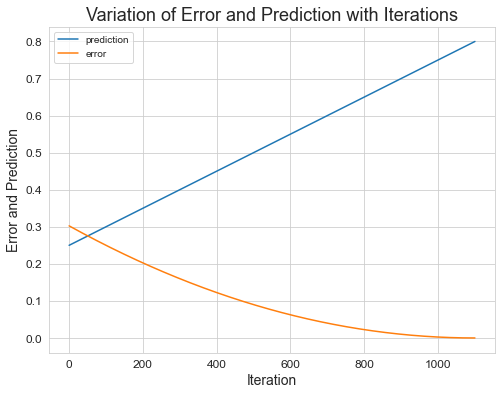

In [20]:
ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error and Prediction with Iterations')
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

### Problems with Hot and Cold learning:
* It is inefficient because you predict three times for each weight update (error, error_up and error_down),
* even though you know the correct direction to move weight, you don’t know the correct amount. Instead, you pick a fixed one at random <code>step_amount</code>.
* Furthermore, this amount has nothing to do with error. Whether error is big or tiny, <code>step_amount</code> is the same.
* If the perfect weight (for 0 error) != <code>n.step_amount</code>, the prediction will start to oscillate back and forth around the correct observation value.

### Gradient Descent
#### What is <code>direction_and_amount</code>?
<code>direction_and_amount</code> represents how you want to change weight. The first part <code>(pred - goal_pred)</code>
is what I call pure error, which equals (pred - goal_pred). The
second part c is the multiplication by the input that performs scaling, negative reversal,
and stopping, modifying the pure error so it’s ready to update weight.
#### What is the pure error?
The pure error is (pred - goal_pred), which indicates the raw direction and amount you
missed. If this is a positive number, you predicted too high, and vice versa. If this is a big
number, you missed by a big amount, and so on.
#### What are scaling, negative reversal, and stopping?
Recall that <code>direction_and_amount = (pred - goal_pred) * input</code>. The <code>input</code> term adds 3 attributes:
* Stopping
* Negative revarsal
* Scaling

These three attributes have the combined effect of translating the pure error into the absolute
amount you want to change weight. <b>They do so by addressing three major edge cases
where the pure error isn’t sufficient to make a good modification to weight.</b>
#### What is stopping?
Stopping is the first (and simplest) effect on the pure error caused by multiplying it by
input. Imagine plugging a CD player into your stereo. If you turned the volume all the
way up but the CD player was off, the volume change wouldn’t matter. Stopping addresses
this in a neural network. If input is 0, then it will force direction_and_amount to also
be 0. You don’t learn (change the volume) when input is 0, because there’s nothing
to learn. Every weight value has the same error, and moving it makes no difference
because pred is always 0.
#### What is negative reversal?
This is probably the most difficult and important effect. Normally (when input is positive),
moving weight upward makes the prediction move upward. But if input is negative,
then all of a sudden weight changes directions! When input is negative, moving
weight up makes the prediction go down. It’s reversed! How do you address this? Well,
multiplying the pure error by input will reverse the sign of direction_and_amount in
the event that input is negative. This is negative reversal, ensuring that weight moves in
the correct direction even if input is negative.
#### What is scaling?
Scaling is the third effect on the pure error caused by multiplying it by input. Logically, if
input is big, your weight update should also be big. This is more of a side effect, because
it often goes out of control. Later, you’ll use alpha to address when that happens.

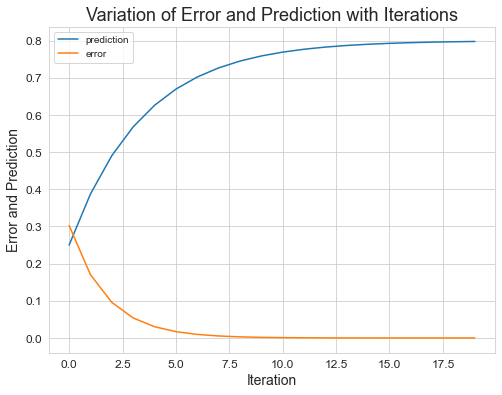

In [21]:
weight = 0.5
goal_pred = 0.8
input = 0.5

lst_predictions = []
lst_errors = []

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input
    weight = weight - direction_and_amount
    lst_predictions.append(pred)
    lst_errors.append(error)

#     print("Error:" + str(error) + " Prediction:" + str(pred))

err_df = pd.DataFrame(list(zip(lst_predictions, lst_errors)), columns=['prediction','error'])

ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error and Prediction with Iterations');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

In [22]:
# 1) An Empty Network

weight = 0.1 
alpha = 0.01

def neural_network(input, weight):
    prediction = input * weight
    return prediction

# 2) PREDICT: Making A Prediction And Evaluating Error

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!)

input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]

pred = neural_network(input,weight)
error = (pred - goal_pred) ** 2

# 3) COMPARE: Calculating "Node Delta" and Putting it on the Output Node

delta = pred - goal_pred

# 4) LEARN: Calculating "Weight Delta" and Putting it on the Weight

weight_delta = input * delta

# 5) LEARN: Updating the Weight

alpha = 0.01 # fixed before training
weight -= weight_delta * alpha

In [23]:
weight, goal_pred, input = (0.0, 0.8, 0.5)

for iteration in range(4):
    
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.6400000000000001 Prediction:0.0
Error:0.3600000000000001 Prediction:0.2
Error:0.2025 Prediction:0.35000000000000003
Error:0.11390625000000001 Prediction:0.4625


In [24]:
weight, goal_pred, input = (0.0, 0.8, 1.1)

weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst = [], [], [], [], []

for iteration in range(8):
#     print("-----\nWeight:" + str(weight))
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
#     print("Error:" + str(error) + " Prediction:" + str(pred))
#     print("Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))
    weight_lst.append(weight)
    delta_lst.append(delta)
    weight_delta_lst.append(weight_delta)
    error_lst.append(error)
    prediction_lst.append(pred)

err_df = pd.DataFrame(list(zip(weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst)), 
                      columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
err_df

,weight,delta,weight_delta,error,prediction
0,0.880000,-0.800000,-0.880000,6.400000e-01,0.000000
1,0.695200,0.168000,0.184800,2.822400e-02,0.968000
2,0.734008,-0.035280,-0.038808,1.244678e-03,0.764720
3,0.725858,0.007409,0.008150,5.489032e-05,0.807409
4,0.727570,-0.001556,-0.001711,2.420663e-06,0.798444
5,0.727210,0.000327,0.000359,1.067512e-07,0.800327
6,0.727286,-0.000069,-0.000075,4.707730e-09,0.799931
7,0.727270,0.000014,0.000016,2.076109e-10,0.800014


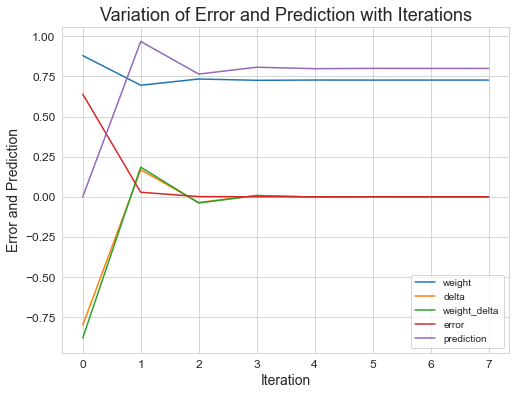

In [25]:
ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error and Prediction with Iterations');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

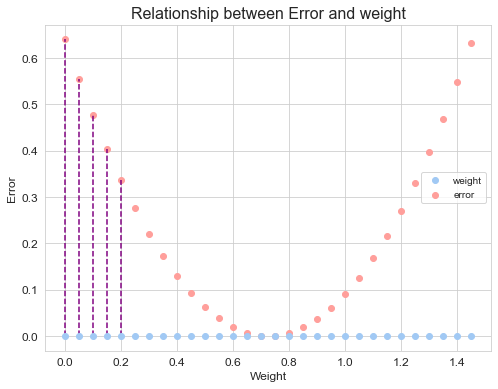

In [26]:
goal_pred, input = (0.8, 1.1)

# pred = input * weight
# error = (pred - goal_pred) ** 2

weight = np.arange(0, 1.5, 0.05)
x = [0 for x in range(len(weight))]

def error_calc(p):
    return (1.1*p - goal_pred) ** 2

error = [error_calc(w) for w in weight]

fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(weight, error, c='r', label='error')
plt.plot(weight, x, 'bo', label = 'weight')
plt.vlines(x = weight[:5], ymin = 0, ymax = error[:5], colors = 'purple', ls='--')
plt.title('Relationship between Error and weight', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend()
plt.show()

### Let's Watch Several Steps of Learning

In [27]:
weight, goal_pred, input = (0.0, 0.8, 1.1)

for iteration in range(4):
    print("-----\nWeight:" + str(weight))
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print("Error:" + str(error) + " Prediction:" + str(pred))
    print("Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))

-----
Weight:0.0
Error:0.6400000000000001 Prediction:0.0
Delta:-0.8 Weight Delta:-0.8800000000000001
-----
Weight:0.8800000000000001
Error:0.02822400000000005 Prediction:0.9680000000000002
Delta:0.16800000000000015 Weight Delta:0.1848000000000002
-----
Weight:0.6951999999999999
Error:0.0012446784000000064 Prediction:0.76472
Delta:-0.03528000000000009 Weight Delta:-0.0388080000000001
-----
Weight:0.734008
Error:5.4890317439999896e-05 Prediction:0.8074088
Delta:0.007408799999999993 Weight Delta:0.008149679999999992


### How to use derivatives  to learn

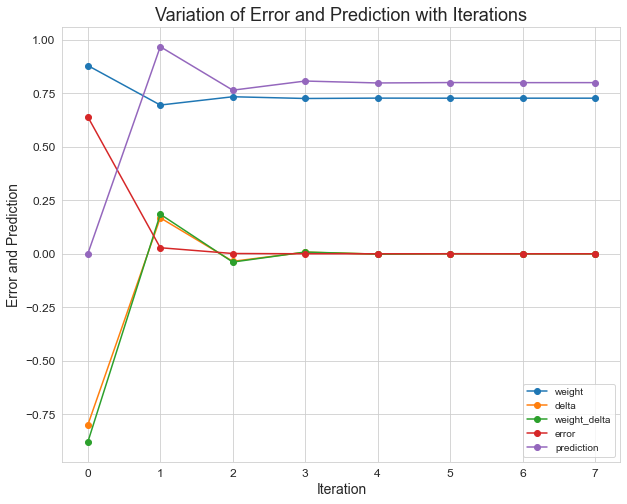

In [28]:
weight = 0.0
goal_pred = 0.8
x = 1.1
weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst = [], [], [], [], []

for iteration in range(8):
    pred = x * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * x
    weight = weight - weight_delta
    weight_lst.append(weight)
    delta_lst.append(delta)
    weight_delta_lst.append(weight_delta)
    error_lst.append(error)
    prediction_lst.append(pred)
#     result_string = f'''
#     Iteration: {iteration+1}
#     Error: {error}  Delta: {delta} Prediction: {pred}
#     '''
#     print(result_string)

err_df = pd.DataFrame(list(zip(weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst)), 
                      columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
ax = err_df.plot(figsize=(10, 8), title = 'Variation of Error and Prediction with Iterations', style='o-');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

### Breaking Gradient Descent

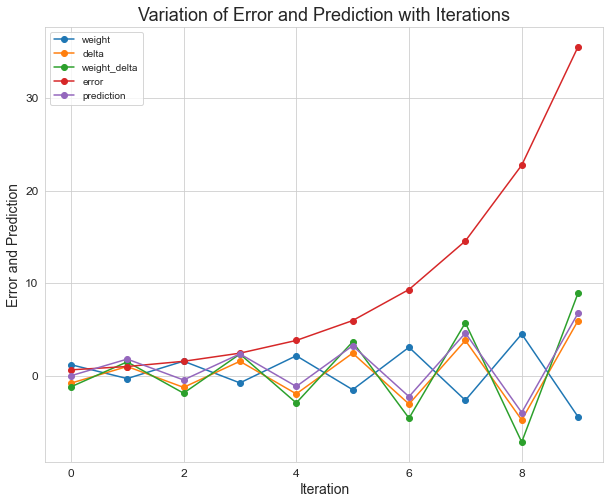

In [29]:
weight = 0.0
goal_pred = 0.8
x = 1.5
weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst = [], [], [], [], []

for iteration in range(10):
    pred = x * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * x
    weight = weight - weight_delta
    weight_lst.append(weight)
    delta_lst.append(delta)
    weight_delta_lst.append(weight_delta)
    error_lst.append(error)
    prediction_lst.append(pred)
#     result_string = f'''
#     Iteration: {iteration+1}
#     Error: {error}  Delta: {delta} Prediction: {pred}
#     '''
#     print(result_string)

err_df = pd.DataFrame(list(zip(weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst)), 
                      columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
ax = err_df.plot(figsize=(10, 8), title = 'Variation of Error and Prediction with Iterations', style='o-');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

### Introducing $\alpha$

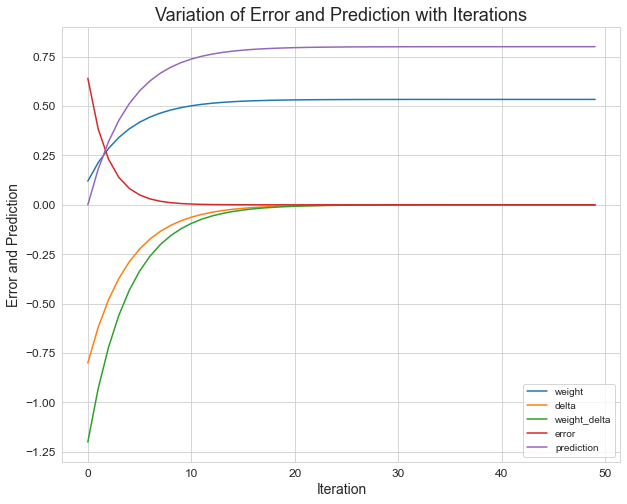

In [30]:
weight = 0.0
goal_pred = 0.8
x = 1.5
alpha = 0.1
weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst = [], [], [], [], []

for iteration in range(50):
    pred = x * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * x
    weight = weight - weight_delta*alpha
    weight_lst.append(weight)
    delta_lst.append(delta)
    weight_delta_lst.append(weight_delta)
    error_lst.append(error)
    prediction_lst.append(pred)
#     result_string = f'''
#     Iteration: {iteration+1}
#     Error: {error}  Delta: {delta} Prediction: {pred}
#     '''
#     print(result_string)

err_df = pd.DataFrame(list(zip(weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst)), 
                      columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
ax = err_df.plot(figsize=(10, 8), title = 'Variation of Error and Prediction with Iterations');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

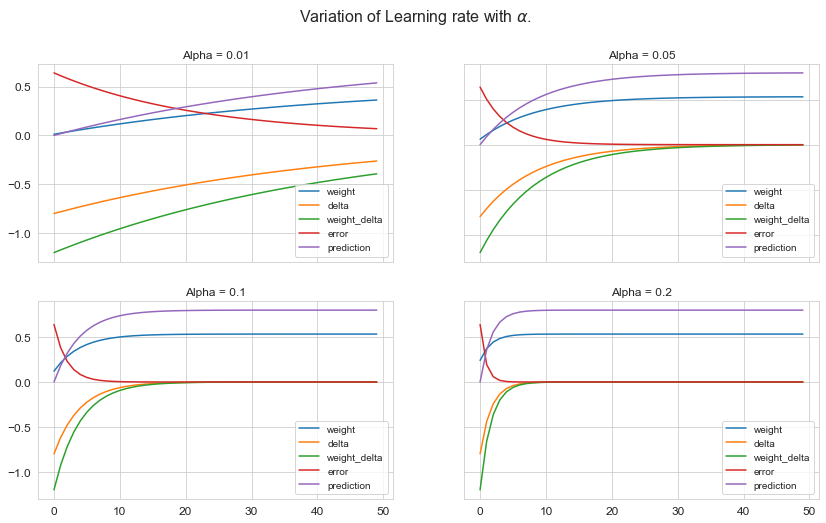

In [31]:
goal_pred = 0.8
x = 1.5
lst_alpha = [0.01, 0.05, 0.1, 0.2]

weight_lst_mst, delta_lst_mst, weight_delta_lst_mst, error_lst_mst, prediction_lst_mst = [], [], [], [], []

for alpha in lst_alpha:
    weight = 0.0
    weight_lst, delta_lst, weight_delta_lst, error_lst, prediction_lst = [], [], [], [], []
    weight_lst_mst.append(weight_lst)
    delta_lst_mst.append(delta_lst)
    weight_delta_lst_mst.append(weight_delta_lst)
    error_lst_mst.append(error_lst)
    prediction_lst_mst.append(prediction_lst)
    for iteration in range(50):
        pred = x * weight
        error = (pred - goal_pred) ** 2
        delta = pred - goal_pred
        weight_delta = delta * x
        weight = weight - weight_delta*alpha
        weight_lst.append(weight)
        delta_lst.append(delta)
        weight_delta_lst.append(weight_delta)
        error_lst.append(error)
        prediction_lst.append(pred)
        
err_df_1 = pd.DataFrame(list(zip(weight_lst_mst[0], delta_lst_mst[0], weight_delta_lst_mst[0], error_lst_mst[0], 
                               prediction_lst_mst[0])), columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
err_df_2 = pd.DataFrame(list(zip(weight_lst_mst[1], delta_lst_mst[1], weight_delta_lst_mst[1], error_lst_mst[1], 
                               prediction_lst_mst[1])), columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
err_df_3 = pd.DataFrame(list(zip(weight_lst_mst[2], delta_lst_mst[2], weight_delta_lst_mst[2], error_lst_mst[2], 
                               prediction_lst_mst[2])), columns=['weight','delta', 'weight_delta', 'error', 'prediction'])
err_df_4 = pd.DataFrame(list(zip(weight_lst_mst[3], delta_lst_mst[3], weight_delta_lst_mst[3], error_lst_mst[3], 
                               prediction_lst_mst[3])), columns=['weight','delta', 'weight_delta', 'error', 'prediction'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (14, 8))

err_df_1.plot(ax=axes[0,0])
err_df_2.plot(ax=axes[0,1])
err_df_3.plot(ax=axes[1,0])
err_df_4.plot(ax=axes[1,1])
title = r'Variation of Learning rate with $\alpha$.'
fig.suptitle(title, fontsize = 16)
axes[0, 0].set_title('Alpha = 0.01')
axes[0, 1].set_title('Alpha = 0.05')
axes[1, 0].set_title('Alpha = 0.1')
axes[1, 1].set_title('Alpha = 0.2')

for ax in axes.flat:
    ax.label_outer()
plt.show()

### Generalizing Gradient Descent
#### GD with multiple inputs $\rightarrow$ 1 output

In [32]:
            #toes %win #fans
weights = [ [0.1, 0.1, -0.3],#hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] ]#sad?

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0

    for i in range(len(a)):
        output += (a[i] * b[i])

    return output

def vect_mat_mul(vect,matrix):
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i])
    return output

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred

toes  = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt  = [0.1, 0.0, 0.0, 0.1]
win   = [  1,   1,   0,   1]
sad   = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01

input = [toes[0],wlrec[0],nfans[0]]
true  = [hurt[0], win[0], sad[0]]

pred = neural_network(input,weights)

error = [0, 0, 0] 
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

In [33]:
import numpy as np
def outer_prod(a, b):
    
    # just a matrix of zeros
    out = np.zeros((len(a), len(b)))

    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = a[i] * b[j]
    return out

weight_deltas = outer_prod(delta,input)

for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

In [34]:
weights

[[0.061325, 0.0970425, -0.30546],
 [0.1017, 0.20013, 0.00023999999999999887],
 [-0.07352500000000001, 1.2943775, 0.08962]]